In [387]:
import magic
import scprep

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Matplotlib command for Jupyter notebooks only
%matplotlib inline

import graphtools
import ot
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA

In [392]:
# generate data

def rotate(x, angle):
    """rotate a point by angle"""
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    return np.matmul(R, x)

def WavyArm(t):
    if t > 1.0 or t < 0:
        print('Out of Bound')
    elif t < 0.2:
        return np.array([t, 0])
    else:
        return np.array([t, 0.1 * np.sin(4 * np.pi * 1.25 * (t - 0.2))])
    
def kWavyArms(T):
    S = np.empty(shape=[0, 2])
    k = 0
    for t in T:
        k += 1
        angle = k * 2 * np.pi / len(Ts)
        temp = np.array([WavyArm(ti) for ti in t])
        X = np.array([rotate(xi, angle) for xi in temp])
        S = np.concatenate((S, X), axis=0)
    return S

def impute(X, P, t):
    return np.array(np.linalg.matrix_power(P, t).dot(X))

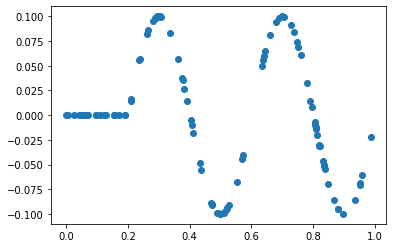

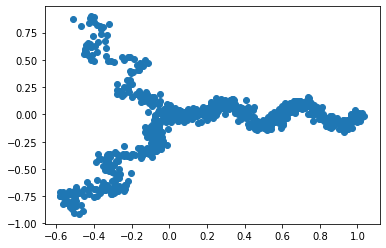

In [389]:
Ts = [np.random.rand(100), np.random.rand(250), np.random.rand(400)]
# print(Ts)

# S = np.array([0,0])
S = np.empty(shape=[0, 2])
k = 0
for t in Ts:
    k += 100
    angle = k * 2 * np.pi / len(Ts)
    temp = np.array([WavyArm(ti) for ti in t])
#     print(temp)
    X = np.array([rotate(xi, angle) for xi in temp])
#     print(X)
    S = np.concatenate((S, X), axis=0)
    
# print(S.shape)

wa = np.array([WavyArm(ti) for ti in np.random.rand(100)])
plt.scatter(wa[:, 0], wa[:, 1])
plt.show()
plt.clf()


X_true = kWavyArms(Ts)
n, m = X_true.shape
X = X_true + 0.03 * np.random.randn(n, m)
plt.scatter(X[:, 0], X[:, 1])


n, m = X.shape
print(n, m)

C = distance_matrix(X, X)
np.fill_diagonal(C, np.inf)

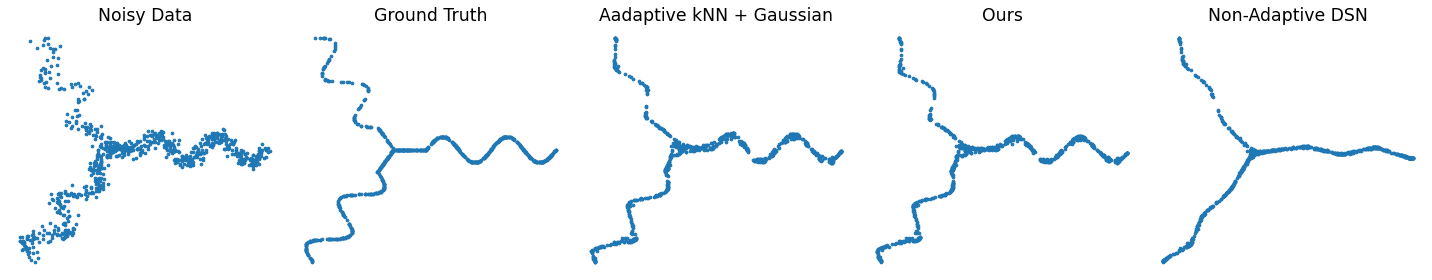

In [507]:
t = 5

magic_op_knn = magic.MAGIC()
magic_op_knn.set_params(t=t)
X_magic = magic_op_knn.fit_transform(X, genes='all_genes')

eps = 0.5
P_qot = ot.smooth.smooth_ot_dual(np.ones(n), np.ones(n), C, eps, reg_type='l2')

sigma = 0.05
P_ent = ot.sinkhorn(np.ones(n), np.ones(n), C, sigma)

X_qot = impute(X, P_qot, t)
X_ent = impute(X, P_ent, t)


fig, (ax4, ax5, ax1, ax2, ax3) = plt.subplots(1,5, figsize=(20, 4))

scprep.plot.scatter(x=X_magic[:, 0], y=X_magic[:, 1], ax=ax1, title='Aadaptive kNN + Gaussian').axis('off')

scprep.plot.scatter(x=X_qot[:, 0], y=X_qot[:, 1], ax=ax2, title='Ours').axis('off')

scprep.plot.scatter(x=X_ent[:, 0], y=X_ent[:, 1], ax=ax3, title='Non-Adaptive DSN').axis('off')

scprep.plot.scatter(x=X_true[:, 0], y=X_true[:, 1], ax=ax5, title='Ground Truth').axis('off')

scprep.plot.scatter(x=X[:, 0], y=X[:, 1], ax=ax4, title='Noisy Data').axis('off')

plt.tight_layout()

plt.savefig("../../figs/ToyMAGIC.jpg")
plt.show()

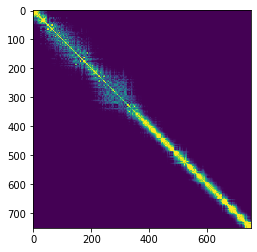

In [516]:
P_knn = scprep.utils.toarray(magic_op_ent.diff_op)
ind = np.argsort(X[:, 0])

t=2
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))
Q_qot = np.linalg.matrix_power(P_qot, t)[ind, :][:, ind]
plt.imshow(Q_qot, vmax = np.quantile(Q_qot, 0.98))

# plt.imshow(P_ent, vmax = np.quantile(P_ent, 0.98), ax=ax2)

# plt.imshow(P_knn, vmax = np.quantile(P_knn, 0.98), ax=ax3)

# plt.tight_layout()

# # plt.savefig("../../figs/ToyMAGIC.jpg")
# plt.show()
print(np.sum(Q_qot > 0)/n**2)

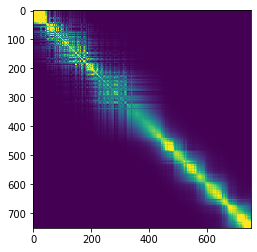

In [517]:
Q_ent = np.linalg.matrix_power(P_ent, t)[ind, :][:, ind]

plt.imshow(Q_ent, vmax = np.quantile(Q_ent, 0.98))
print(np.sum(Q_ent > 0)/n**2)

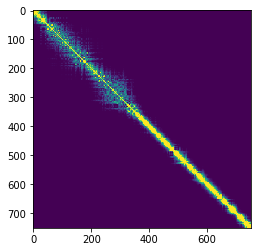

In [518]:
# Q = np.linalg.matrix_power(scprep.utils.toarray(magic_op_ent.diff_op), 100)
P_knn = scprep.utils.toarray(magic_op_knn.diff_op)

Q_knn = np.linalg.matrix_power(P_knn, t)[ind, :][:, ind]

plt.imshow(Q_knn, vmax = np.quantile(Q_knn, 0.98))
print(np.sum(Q_knn > 0)/n**2)
# P_knn

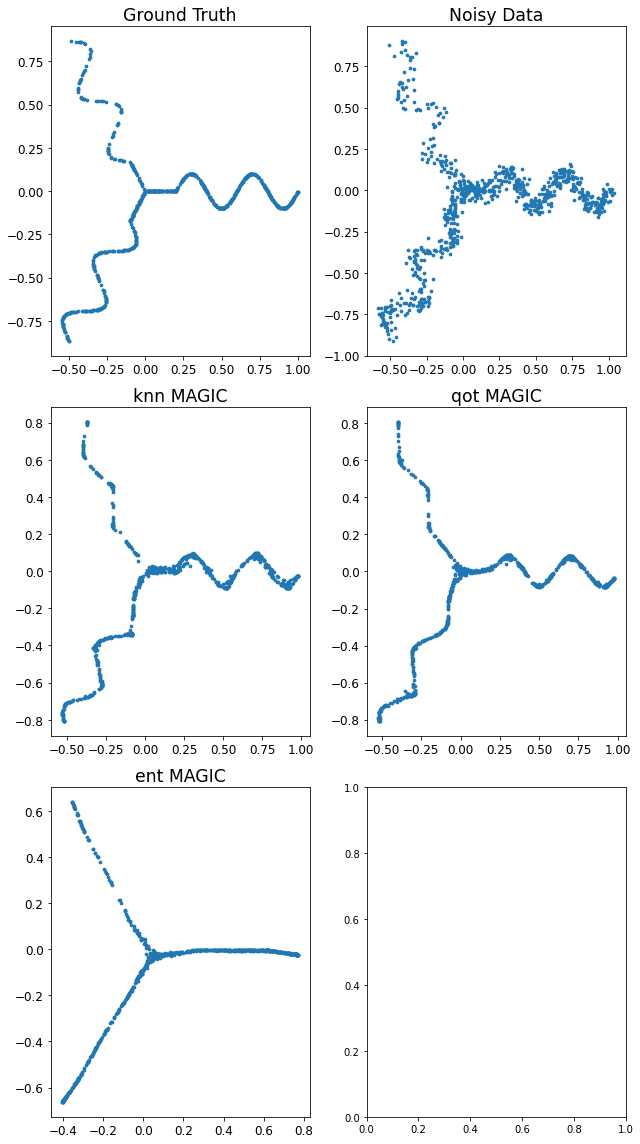

In [414]:
fig, ([[ax1, ax2], [ax3, ax4], [ax5, ax6]]) = plt.subplots(3,2, figsize=(9, 16))

scprep.plot.scatter(x=X_true[:, 0], y=X_true[:, 1], ax=ax1,title='Ground Truth')

scprep.plot.scatter(x=X[:, 0], y=X[:, 1], ax=ax2,title='Noisy Data')

scprep.plot.scatter(x=X_knn[:, 0], y=X_knn[:, 1], ax=ax3, title='knn MAGIC')

scprep.plot.scatter(x=X_qot[:, 0], y=X_qot[:, 1], ax=ax4, title='qot MAGIC')

scprep.plot.scatter(x=X_ent[:, 0], y=X_ent[:, 1], ax=ax5, title='ent MAGIC')



plt.tight_layout()
# plt.savefig("../../figs/eps=01_t=3.jpg")
plt.show()

In [ ]:
k = 10
t = 10

G_knn = graphtools.Graph(X, n_pca=None, knn=k)
P_knn = G_knn.diff_op.todense() # is this adaptive?

# use MAGIC
magic_op_knn = magic.MAGIC(knn_max=n)
magic_op_knn.set_params(t=t)
X_knn = magic_op_knn.fit_transform(X, graph=G_knn, genes="all_genes")

# do it manually 
X_impute = np.array(np.linalg.matrix_power(P_knn, t).dot(X_pca))

plt.subplot(1, 2, 1)
plt.scatter(X_impute[:, 0], X_impute[:, 1])
plt.title("Manual")
plt.subplot(1, 2, 2)
plt.scatter(X_knn[:, 0], X_knn[:, 1])
plt.title("MAGIC")

# plt.clf()
# plt.scatter(X_impute[:, 0], X_impute[:, 1])

In [ ]:
sigma = 0.05
# sinkhorn
P_ent = ot.sinkhorn(np.ones(n), np.ones(n), C, sigma)
# just gaussian
# P_ent = np.exp(-C/sigma)
# P_ent = (P_ent.T/P_ent.sum(-1)).T

t = 5
X_impute = np.array(np.linalg.matrix_power(P_ent, t).dot(X_pca))
plt.scatter(X_impute[:, 0], X_impute[:, 1])

In [ ]:
eps = 1
P_qot = ot.smooth.smooth_ot_dual(np.ones(n), np.ones(n), C, eps, reg_type='l2')

X_impute = np.array(np.linalg.matrix_power(P_qot, t).dot(X_pca))
plt.scatter(X_impute[:, 0], X_impute[:, 1])